In [1]:
from applications.denoiser_environment import DenoiserEnvironment

In [2]:
PATH_BASE = "/home/amedvedev/fprojects/python/denoising"
NAME_DATASET = "gcg14"
width, height = 30, 30
env = DenoiserEnvironment(name_model="model_11", name_dataset=NAME_DATASET, path_base=PATH_BASE)

In [7]:
from datageneration.generators import GenPolyDataset
from datageneration import paramsgens

generate_settings = [("train", 800), ("val", 200)]

for (data_category, count) in generate_settings:
    env.generate_data(NAME_DATASET, data_category, n=count, width=width, height=height,
                      cell_size=paramsgens.GenCellSizeInSet([1, 2]),
                      pct_noise=paramsgens.GenPctUniformNoiseRange(a=0.01, b=0.5),
                      k0=paramsgens.GenK0InRange(min_val=3, max_val=100),
                      csv=True, txt=True, png=True,
                      generator_class=GenPolyDataset,
                      )

# pct_noise=0.1, k0=55.0,

Generating dataset gcg14/train...
Progress: |██████████████████████████████| 100.0% Complete | 

Generating dataset gcg14/val...
Progress: |██████████████████████████████| 100.0% Complete | 



In [3]:
import models
env.init_model(models.autoencoders.ConvAutoencoderLuma3)

New model created.


In [3]:
env.load_model(model_type="pt")

In [4]:
from common.fstream import read_tensor, read_matrix
env.load_data(width, height, batch_size=4, read_tensor_x=read_tensor, read_tensor_y=read_tensor)

/home/amedvedev/fprojects/python/denoising/venv/lib/python3.10/site-packages/torch/_tensor.py:836: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


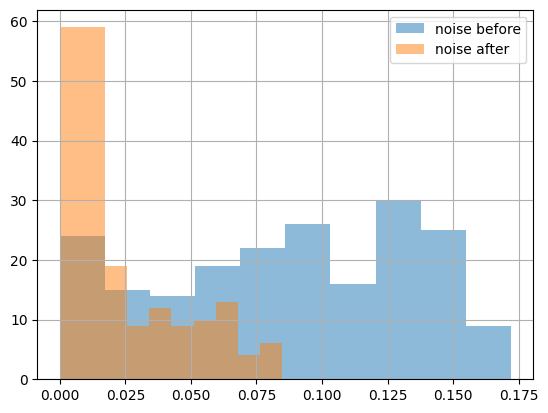

In [5]:
scores_before, scores = env.score(show=True)

In [6]:
env.train(20, step_saving=False, step_plotting=False)

Training progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Validating progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Epoch: 1 	Training Loss: 0.018836 	Validating Loss: 0.014448 	Time: 0.07 m


Training progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Validating progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Epoch: 2 	Training Loss: 0.012492 	Validating Loss: 0.011307 	Time: 0.06 m


Training progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Validating progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Epoch: 3 	Training Loss: 0.010252 	Validating Loss: 0.009400 	Time: 0.06 m


Training progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Validating progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Epoch: 4 	Training Loss: 

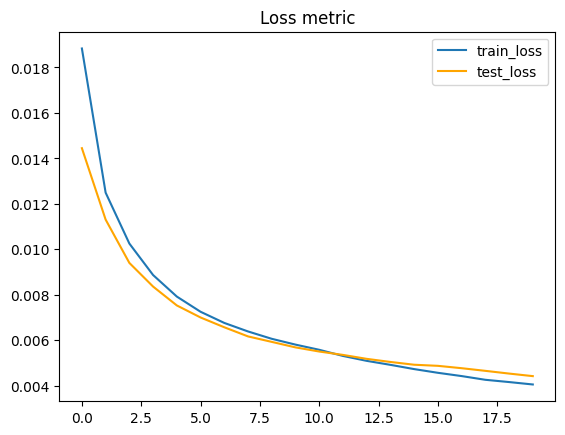

In [7]:
env.show_metrics(n_last=20)

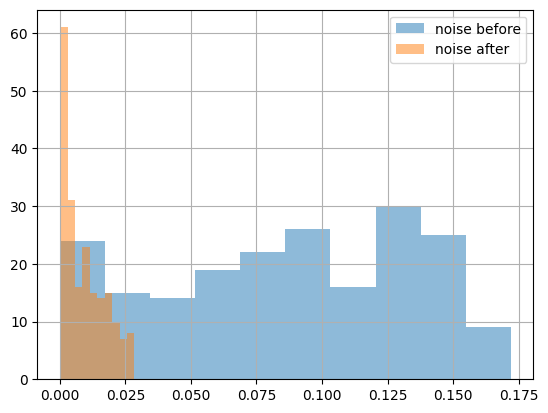

In [8]:
scores_before, scores = env.score(show=True)

In [11]:
env.save(pth=True, onnx=True)

Exported graph: graph(%img : Float(1, 1, 30, 30, strides=[900, 900, 30, 1], requires_grad=0, device=cuda:0),
      %all_layers.0.weight : Float(76, 1, 3, 3, strides=[9, 9, 3, 1], requires_grad=1, device=cuda:0),
      %all_layers.0.bias : Float(76, strides=[1], requires_grad=1, device=cuda:0),
      %all_layers.3.weight : Float(38, 76, 2, 2, strides=[304, 4, 2, 1], requires_grad=1, device=cuda:0),
      %all_layers.3.bias : Float(38, strides=[1], requires_grad=1, device=cuda:0),
      %all_layers.6.weight : Float(38, 38, 2, 2, strides=[152, 4, 2, 1], requires_grad=1, device=cuda:0),
      %all_layers.6.bias : Float(38, strides=[1], requires_grad=1, device=cuda:0),
      %all_layers.9.weight : Float(38, 38, 2, 2, strides=[152, 4, 2, 1], requires_grad=1, device=cuda:0),
      %all_layers.9.bias : Float(38, strides=[1], requires_grad=1, device=cuda:0),
      %all_layers.11.weight : Float(38, 76, 2, 2, strides=[304, 4, 2, 1], requires_grad=1, device=cuda:0),
      %all_layers.11.bias : Flo

In [12]:
env.test_on_dataset(include_train=False, include_test=True, cmap="jet")

Testing data: /home/amedvedev/fprojects/python/denoising/data/datasets/gcg14/val
Progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Testing ended.


Show example №29


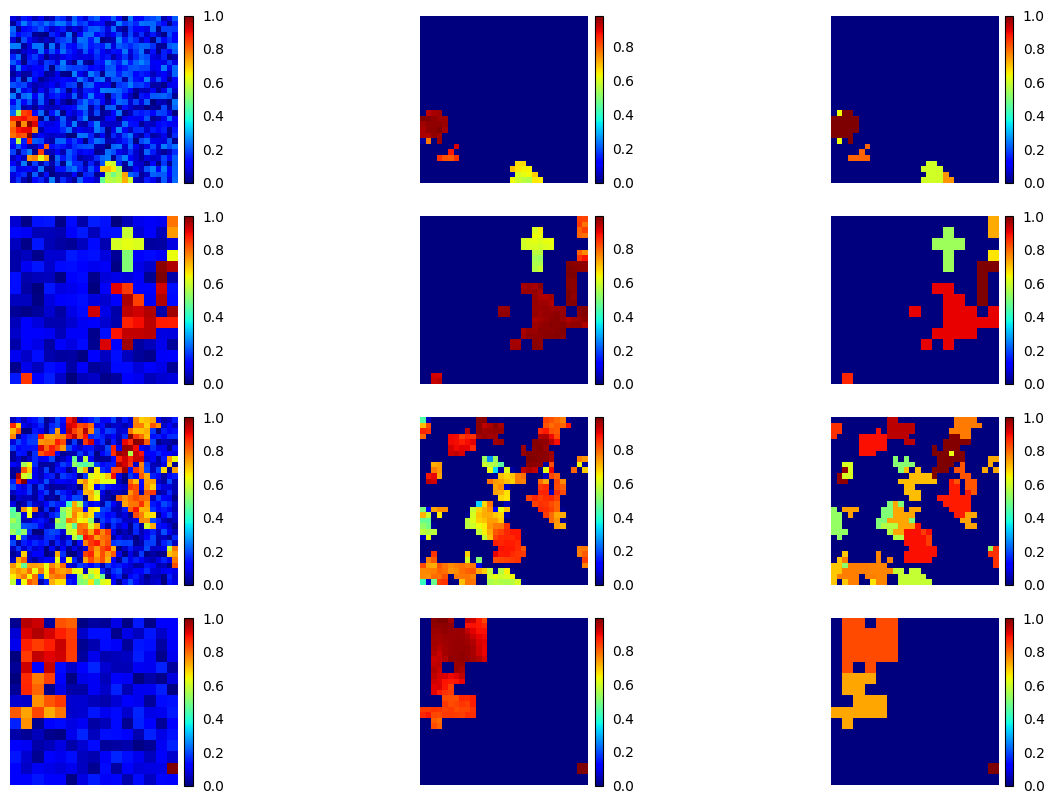

In [9]:
env.show_single(concrete=None, op_count=1, figsize=(15, 10), cmap="jet")

In [68]:
import gc
import torch
env.model.cpu()
del env.model
gc.collect()
torch.cuda.empty_cache()